In [1]:
!pip install wordcloud

In [1]:
import os
import time
import datetime
import nltk

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import StanfordPOSTagger


from wordcloud import WordCloud

from pymongo import MongoClient
from pymongo import TEXT

import matplotlib.pyplot as plt
%matplotlib inline

nltk.download('punkt')
nltk.download('stopwords')

import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Connecting to database and getting texts

In [2]:
# Creating a connection to MongoDB
client = MongoClient("localhost", 27017)
db = client["news"]
collection = db["elespectador"]

In [3]:
text = []
for news in list(collection.find({}, {"title": 1, "summary": 1, "full_text": 1, "_id": 0})):
    text.append(news["title"])
    text.append(news["summary"])
    text.append(news["full_text"])

In [4]:
text = " ".join(text)

In [5]:
text

'En 2022, Gobierno podrá tomar cuentas bancarias que tengan menos de 92.000 pesos Así lo aprobó el Congreso en el proyecto del Presupuesto General de la Nación para el otro año. Aplica para cuentas que llevan más de un año inactivas. En la discusión sobre el Presupuesto General de la Nación para 2022, el Congreso de la República aprobó que el Gobierno pueda tomar el dinero de cuentas que contengan menos de 92.000 pesos y que se registren inactivas durante todo un año.  (Lea acá las noticias del mundo político) Según se dijo en el debate, la medida sería para robustecer, justamente, los recursos para que opere el Estado el próximo año, y entraría a regir una vez este proyecto sea sancionado por el presidente Iván Duque Márquez.  Esta acción fue estipulada en el artículo 78 del texto aprobado por la Cámara. Este dice: “Los saldos de las cuentas corrientes o de ahorro que hayan permanecido inactivas por un periodo mayor a un año y no superen el valor equivalente a 322 UVR, serán transferi

### Lowercasing

In [6]:
text = text.lower() # WARNING

### Tokenization

In [7]:
sentences = sent_tokenize(text)

print(sentences)

['en 2022, gobierno podrá tomar cuentas bancarias que tengan menos de 92.000 pesos así lo aprobó el congreso en el proyecto del presupuesto general de la nación para el otro año.', 'aplica para cuentas que llevan más de un año inactivas.', 'en la discusión sobre el presupuesto general de la nación para 2022, el congreso de la república aprobó que el gobierno pueda tomar el dinero de cuentas que contengan menos de 92.000 pesos y que se registren inactivas durante todo un año.', '(lea acá las noticias del mundo político) según se dijo en el debate, la medida sería para robustecer, justamente, los recursos para que opere el estado el próximo año, y entraría a regir una vez este proyecto sea sancionado por el presidente iván duque márquez.', 'esta acción fue estipulada en el artículo 78 del texto aprobado por la cámara.', 'este dice: “los saldos de las cuentas corrientes o de ahorro que hayan permanecido inactivas por un periodo mayor a un año y no superen el valor equivalente a 322 uvr, s

In [8]:
words = word_tokenize(text)

print(words)

['en', '2022', ',', 'gobierno', 'podrá', 'tomar', 'cuentas', 'bancarias', 'que', 'tengan', 'menos', 'de', '92.000', 'pesos', 'así', 'lo', 'aprobó', 'el', 'congreso', 'en', 'el', 'proyecto', 'del', 'presupuesto', 'general', 'de', 'la', 'nación', 'para', 'el', 'otro', 'año', '.', 'aplica', 'para', 'cuentas', 'que', 'llevan', 'más', 'de', 'un', 'año', 'inactivas', '.', 'en', 'la', 'discusión', 'sobre', 'el', 'presupuesto', 'general', 'de', 'la', 'nación', 'para', '2022', ',', 'el', 'congreso', 'de', 'la', 'república', 'aprobó', 'que', 'el', 'gobierno', 'pueda', 'tomar', 'el', 'dinero', 'de', 'cuentas', 'que', 'contengan', 'menos', 'de', '92.000', 'pesos', 'y', 'que', 'se', 'registren', 'inactivas', 'durante', 'todo', 'un', 'año', '.', '(', 'lea', 'acá', 'las', 'noticias', 'del', 'mundo', 'político', ')', 'según', 'se', 'dijo', 'en', 'el', 'debate', ',', 'la', 'medida', 'sería', 'para', 'robustecer', ',', 'justamente', ',', 'los', 'recursos', 'para', 'que', 'opere', 'el', 'estado', 'el', '

### Words distribution

### Stopwords

Stop words are basically a set of commonly used words in any language, not just English.

The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead.

In [9]:
stop_words = set(stopwords.words("spanish"))
print(stop_words)

{'estéis', 'fueron', 'algunos', 'han', 'habrá', 'habías', 'estamos', 'e', 'hube', 'mío', 'fuisteis', 'esa', 'estuviesen', 'estad', 'donde', 'seríais', 'él', 'tanto', 'será', 'estarían', 'a', 'por', 'fueses', 'tengáis', 'estados', 'esas', 'eres', 'estoy', 'tendría', 'el', 'tuvo', 'ni', 'erais', 'hubiesen', 'tuyo', 'es', 'tendrían', 'serán', 'otras', 'seré', 'tengo', 'hubo', 'tuvieran', 'vosotras', 'muy', 'sintiendo', 'cual', 'sois', 'fueras', 'estuvieseis', 'quien', 'estés', 'nuestros', 'tuve', 'suyo', 'contra', 'estuvierais', 'estás', 'te', 'para', 'nada', 'tenía', 'tuvimos', 'ella', 'sin', 'mucho', 'fue', 'estar', 'fuese', 'tuviéramos', 'otros', 'tenías', 'como', 'habréis', 'hubiera', 'otro', 'me', 'tuvisteis', 'pero', 'sean', 'tendrías', 'sería', 'hubimos', 'su', 'habíamos', 'habéis', 'estaré', 'hayáis', 'habrías', 'éramos', 'estáis', 'o', 'sentida', 'habríais', 'serías', 'estada', 'estaréis', 'hayamos', 'fui', 'tendremos', 'estuvieron', 'esto', 'y', 'poco', 'suyos', 'tenida', 'serás

In [10]:
filtered_words = []
for w in words:
    if w not in stop_words:
        filtered_words.append(w)

print("All words:", words)
print("\n")
print("Substracting stopwords:", filtered_words)

All words: ['en', '2022', ',', 'gobierno', 'podrá', 'tomar', 'cuentas', 'bancarias', 'que', 'tengan', 'menos', 'de', '92.000', 'pesos', 'así', 'lo', 'aprobó', 'el', 'congreso', 'en', 'el', 'proyecto', 'del', 'presupuesto', 'general', 'de', 'la', 'nación', 'para', 'el', 'otro', 'año', '.', 'aplica', 'para', 'cuentas', 'que', 'llevan', 'más', 'de', 'un', 'año', 'inactivas', '.', 'en', 'la', 'discusión', 'sobre', 'el', 'presupuesto', 'general', 'de', 'la', 'nación', 'para', '2022', ',', 'el', 'congreso', 'de', 'la', 'república', 'aprobó', 'que', 'el', 'gobierno', 'pueda', 'tomar', 'el', 'dinero', 'de', 'cuentas', 'que', 'contengan', 'menos', 'de', '92.000', 'pesos', 'y', 'que', 'se', 'registren', 'inactivas', 'durante', 'todo', 'un', 'año', '.', '(', 'lea', 'acá', 'las', 'noticias', 'del', 'mundo', 'político', ')', 'según', 'se', 'dijo', 'en', 'el', 'debate', ',', 'la', 'medida', 'sería', 'para', 'robustecer', ',', 'justamente', ',', 'los', 'recursos', 'para', 'que', 'opere', 'el', 'estad

In [14]:
frec_dist = FreqDist(filtered_words)

print(frec_dist)

<FreqDist with 9017 samples and 41401 outcomes>


In [15]:
frec_dist.most_common(5)

[(',', 3778), ('.', 2100), ('”', 489), ('“', 487), (':', 337)]

<BarContainer object of 16 artists>

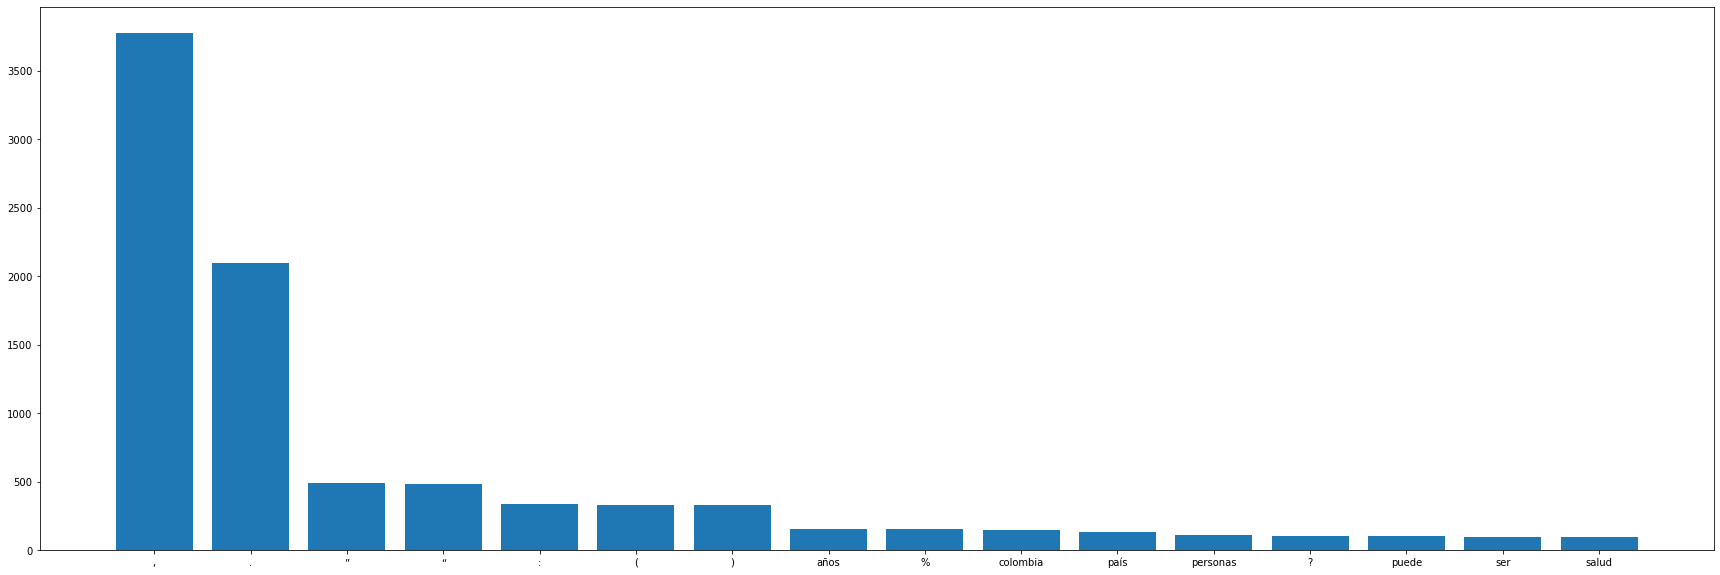

In [24]:
n = 16
plt.figure(figsize=(30,10))
plt.bar([ w[0] for w in frec_dist.most_common(n) ], [ w[1] for w in frec_dist.most_common(n) ])

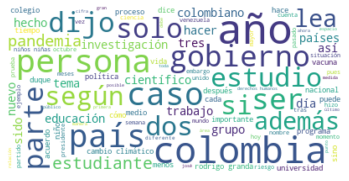

In [17]:
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color = "white").generate(" ".join(filtered_words))

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [25]:
collection.create_index([('title', TEXT), ('summary', TEXT), ('full_text', TEXT)], default_language = 'spanish')

'title_text_summary_text_full_text_text'

In [26]:
list(collection.find({'$text': {'$search': 'covid'}}, {'_id': 0, 'summary': 1, 'title': 1, 'full_text': 1,}))

[{'title': 'Combinar vacunas AstraZeneca, Pfizer y Moderna es efectivo contra el Covid-19 ',
  'summary': 'La combinación de la vacuna AstraZeneca con las de ARNm como Pfizer y Moderna aumentan la efectividad contra el Covid-19, según dice un estudio sueco recién publicado.',
  'full_text': 'Las personas que han recibido una primera dosis de la vacuna contra la covid-19 de Oxford/AstraZeneca y una segunda de ARNm tenían menor riesgo de infección frente a las que recibieron ambas dosis del primer preparado, según un estudio de investigadores de la Universidad de Umea (Suecia). En las vacunas de ARN mensajero (ARNm), como la de Pfizer-BioNTech y Moderna, se emplea ácido ribonucleico para lograr el desarrollo de una respuesta inmune. El profesor de medicina geriátrica de la citada universidad, Peter Nordström, que ha realizado la investigación, ha resaltado que cualquier vacuna aprobada es mejor que ninguna. (Para más información confiable sobre vacunas y coronavirus, lea El Espectador) “

### Part of Speech

https://nlp.stanford.edu/software/

In [ ]:
jar = "./pos-tagger/stanford-postagger/stanford-postagger-4.2.0.jar"
model = "./pos-tagger/stanford-postagger/models/spanish-ud.tagger"

In [ ]:
java_path = "/usr/bin/java"
os.environ["JAVAHOME"] = java_path

In [ ]:
pos_tagger = StanfordPOSTagger(model, jar, encoding = "utf8")
pos_tagger.tag(words)